In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df = pd.read_excel ('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df ['Additional_Info'].unique()

array(['Null ', 'Null', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [5]:
df ['Additional_Info'].value_counts()

Null                            8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Null                               1
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [6]:
null_pc = len (df [(df ['Additional_Info'] == 'Null ') | (df ['Additional_Info'] == 'Null')]) / len (df ['Additional_Info'])
null_pc * 100

78.14284377047646

In [7]:
df.drop ('Additional_Info', axis = 1, inplace = True)

In [8]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Price            10683 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 834.7+ KB


In [10]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Price              1870
dtype: int64

In [11]:
for i in df.columns:
    print(f'The unique values in feature {i} : ', df[i].unique(), sep = '\n')
    print()

The unique values in feature Airline : 
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

The unique values in feature Date_of_Journey : 
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']

The unique values in feature Source : 
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']

The unique values in feature Destination : 
['New Delhi' 'Ban

In [12]:
df.drop ('Route', axis = 1, inplace = True)

In [13]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648


In [14]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [17]:
df.duplicated().sum()

220

In [18]:
df [df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,14:35,04:25 02 Jun,13h 50m,2 stops,13376
1061,Air India,21/05/2019,Delhi,Cochin,22:00,19:15 22 May,21h 15m,2 stops,10231
1348,Air India,18/05/2019,Delhi,Cochin,17:15,19:15 19 May,26h,2 stops,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,05:30,04:25 07 Jun,22h 55m,2 stops,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,18:25,21:20,2h 55m,non-stop,7303
...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,23:05,12:35 28 Jun,13h 30m,2 stops,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,09:40,12:35 02 Jun,26h 55m,2 stops,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,09:40,12:35 07 Jun,26h 55m,2 stops,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,23:05,19:00 28 Jun,19h 55m,2 stops,11150


In [19]:
df.drop_duplicates (inplace = True)

In [20]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648


In [21]:
df ['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

([<matplotlib.patches.Wedge at 0x21cb7464910>,
 [Text(0.2892183732572589, 1.061297664451602, 'Delhi'),
  Text(-1.0418132232914041, -0.3530229564421769, 'Kolkata'),
  Text(0.2924040256595777, -1.0604243894677607, 'Banglore'),
  Text(0.9961071818680524, -0.4666588499438181, 'Mumbai'),
  Text(1.0928086796791492, -0.12557543397462306, 'Chennai')],
 [Text(0.1577554763221412, 0.5788896351554191, '41.53%'),
  Text(-0.5682617581589476, -0.19255797624118737, '27.34%'),
  Text(0.15949310490522417, -0.5784133033460512, '20.83%'),
  Text(0.5433311901098467, -0.25454119087844623, '6.66%'),
  Text(0.5960774616431722, -0.0684956912588853, '3.64%')])

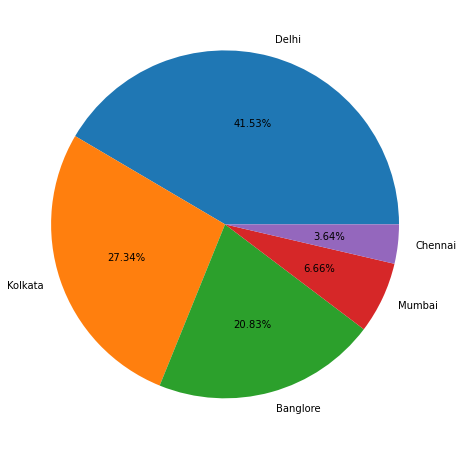

In [22]:
labels3 = ['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai']
plt.figure (figsize = (10, 8))
plt.pie (df ['Source'].value_counts(), labels = labels3, autopct = '%0.2f%%')

In [23]:
df ['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [24]:
df['Destination'] = df['Destination'].replace('New Delhi', 'Delhi')

In [25]:
df ['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        2179
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

([<matplotlib.patches.Wedge at 0x21cb74c0bb0>,
 [Text(0.2892183732572589, 1.061297664451602, 'Cochin'),
  Text(-1.0418132232914041, -0.3530229564421769, 'Banglore'),
  Text(0.2924040256595777, -1.0604243894677607, 'Delhi'),
  Text(0.9961071818680524, -0.4666588499438181, 'Hyderabad'),
  Text(1.0928086796791492, -0.12557543397462306, 'Kolkata')],
 [Text(0.1577554763221412, 0.5788896351554191, '41.53%'),
  Text(-0.5682617581589476, -0.19255797624118737, '27.34%'),
  Text(0.15949310490522417, -0.5784133033460512, '20.83%'),
  Text(0.5433311901098467, -0.25454119087844623, '6.66%'),
  Text(0.5960774616431722, -0.0684956912588853, '3.64%')])

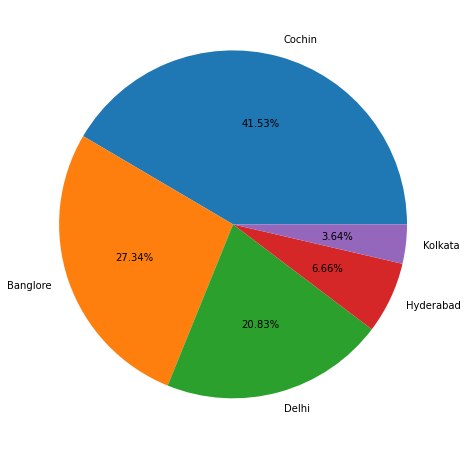

In [26]:
labels4 = ['Cochin', 'Banglore', 'Delhi', 'Hyderabad', 'Kolkata']
plt.figure (figsize = (10, 8))
plt.pie (df ['Destination'].value_counts(), labels = labels4, autopct = '%0.2f%%')

In [27]:
df ['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [28]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
7011,Air India,6/06/2019,Delhi,Cochin,10:55,19:15,8h 20m,2 stops,11753
7740,Jet Airways,9/06/2019,Kolkata,Banglore,18:55,19:50 10 Jun,24h 55m,1 stop,10844
5623,Air India,3/06/2019,Delhi,Cochin,19:45,19:15 04 Jun,23h 30m,2 stops,10441
9509,Jet Airways,9/05/2019,Delhi,Cochin,13:00,19:00,6h,1 stop,15554
6845,IndiGo,18/05/2019,Delhi,Cochin,06:50,22:30,15h 40m,1 stop,7144


In [29]:
df['Airline'] = df['Airline'].replace(['Multiple carriers Premium economy', 'Jet Airways Business', 'Vistara Premium economy'], ['Multiple carriers', 'Jet Airways', 'Vistara'])

In [30]:
df ['Airline'].value_counts()

Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

In [31]:
tru = df [df ['Airline'] == 'Trujet'].index
df.drop (tru, inplace = True)

In [32]:
df ['Airline'].value_counts()

Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

([<matplotlib.patches.Wedge at 0x21cb7546400>,
 [Text(0.4862027737158156, 0.9867151883046331, 'Jet Airways'),
  Text(-1.050179706533791, 0.32729586612818834, 'IndiGo'),
  Text(-0.7503149761374855, -0.80438015675662, 'Air India'),
  Text(0.1329687172257881, -1.0919337526788557, 'Multiple carriers'),
  Text(0.7327480645334059, -0.8204146963106815, 'SpiceJet'),
  Text(0.9892567961008158, -0.4810103859256564, 'Vistara'),
  Text(1.0752985287312444, -0.2318039561966564, 'Air Asia'),
  Text(1.0981336331724407, -0.06405094609367928, 'GoAir')],
 [Text(0.2652015129358994, 0.5382082845297999, '35.43%'),
  Text(-0.5728252944729768, 0.1785250178881027, '19.53%'),
  Text(-0.40926271425681027, -0.43875281277633815, '16.19%'),
  Text(0.07252839121406623, -0.5956002287339213, '11.56%'),
  Text(0.3996807624727668, -0.4474989252603717, '7.79%'),
  Text(0.5395946160549904, -0.2623693014139944, '4.60%'),
  Text(0.5865264702170423, -0.12643852156181257, '3.05%'),
  Text(0.5989819817304222, -0.03493687968746

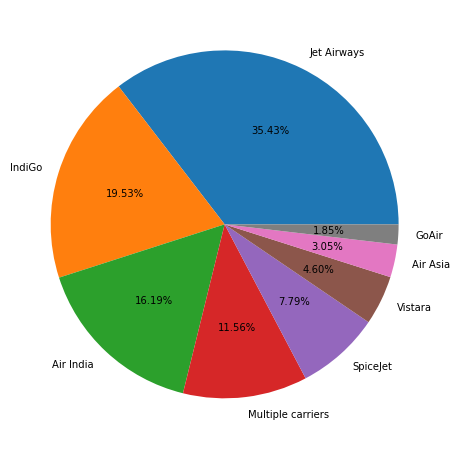

In [33]:
labels5 = ['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet', 'Vistara', 'Air Asia', 'GoAir']
plt.figure (figsize = (10, 8))
plt.pie (df ['Airline'].value_counts(), labels = labels5, autopct = '%0.2f%%')

In [34]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,Delhi,11:30,14:10,2h 40m,non-stop,12648


In [35]:
df['Date_of_Journey'] = pd.to_datetime (df['Date_of_Journey'])

In [36]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3h,non-stop,7229
10681,Vistara,2019-01-03,Banglore,Delhi,11:30,14:10,2h 40m,non-stop,12648


In [37]:
df['day_of_week'] = df['Date_of_Journey'].dt.day_name()

In [38]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,day_of_week
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,Sunday
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,Saturday
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,Friday
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,Thursday
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302,Thursday
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,Wednesday
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,Saturday
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,Saturday
10681,Vistara,2019-01-03,Banglore,Delhi,11:30,14:10,2h 40m,non-stop,12648,Thursday


In [39]:
df ['day_of_week'].value_counts()

Thursday     2231
Friday       1781
Wednesday    1579
Monday       1450
Tuesday      1217
Saturday     1168
Sunday       1035
Name: day_of_week, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Count'>

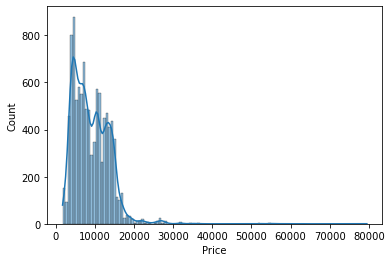

In [40]:
sns.histplot(data = df ['Price'], kde = True)

In [41]:
df ['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia'], dtype=object)

In [3]:
def preprocess(data):
    
    data.dropna(inplace = True)
    
    data.drop_duplicates(inplace = True)
    
    data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
    data['day'] = pd.DatetimeIndex(data['Date_of_Journey']).day
    data['month'] = pd.DatetimeIndex(data['Date_of_Journey']).month
    data['year'] = pd.DatetimeIndex(data['Date_of_Journey']).year
    data['weekday'] = pd.DatetimeIndex(data['Date_of_Journey']).weekday
    
    data['Total_Stops'] = data['Total_Stops'].str.replace('non-stop','0')
    data['Total_Stops'] = data['Total_Stops'].str.replace('stops','')
    data['Total_Stops'] = data['Total_Stops'].str.replace('stop','')
    data['Total_Stops'] = data['Total_Stops'].str.replace(' ','')
    data['Total_Stops'] = data['Total_Stops'].astype(int)
    
    data['Destination'] = np.where(data['Destination']=='New Delhi','Delhi',data['Destination'])
    data['Airline'] = np.where(data['Airline']=='Jet Airways Business','Jet Airways',data['Airline'])
    data['Airline'] = np.where(data['Airline']=='Vistara Premium economy','Vistara',data['Airline'])
    data['Airline'] = np.where(data['Airline']=='Multiple carriers Premium economy','Multiple carriers',data['Airline'])
    
    Arrival_time = []
    for i in data['Arrival_Time']:
        Arrival_time.append(i[:5])
    data['Arrival_Time'] = Arrival_time
    
    data['Arrival_Time_Hour'] = pd.DatetimeIndex(data['Arrival_Time']).hour
    data['Arrival_Time_Minutes'] = pd.DatetimeIndex(data['Arrival_Time']).minute
    
    data['Dep_Time_hour'] = pd.DatetimeIndex(data['Dep_Time']).hour
    data['Dep_Time_Minute'] = pd.DatetimeIndex(data['Dep_Time']).minute
    
    data['Duration_Total_Hour'] = data['Duration'].str.replace("h","*1").str.replace(' ','+').str.replace('m','/60').apply(eval)
    
    data1 = pd.get_dummies(data,prefix = ['Airline','Source','Destination'],columns = ['Airline','Source','Destination'],drop_first = False)
    
    data1.drop(['Date_of_Journey', 'Arrival_Time','Dep_Time','year','Additional_Info'], axis = 1, inplace = True)
    
    return data, data1
    

In [4]:
data, data_model = preprocess (df)

In [5]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,weekday,Arrival_Time_Hour,Arrival_Time_Minutes,Dep_Time_hour,Dep_Time_Minute,Duration_Total_Hour
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10,2h 50m,0,Null,3897,24,3,2019,6,1,10,22,20,2.833333
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,7662,5,1,2019,5,13,15,5,50,7.416667
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,Null,13882,6,9,2019,4,4,25,9,25,19.000000
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,Null,6218,5,12,2019,3,23,30,18,5,5.416667
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,Null,13302,3,1,2019,3,21,35,16,50,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,Null,4107,4,9,2019,2,22,25,19,55,2.500000
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,Null,4145,27,4,2019,5,23,20,20,45,2.583333
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,Null,7229,27,4,2019,5,11,20,8,20,3.000000
10681,Vistara,2019-01-03,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,Null,12648,3,1,2019,3,14,10,11,30,2.666667


In [6]:
data_model

,Route,Duration,Total_Stops,Price,day,month,weekday,Arrival_Time_Hour,Arrival_Time_Minutes,Dep_Time_hour,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,BLR → DEL,2h 50m,0,3897,24,3,6,1,10,22,...,1,0,0,0,0,0,0,1,0,0
1,CCU → IXR → BBI → BLR,7h 25m,2,7662,5,1,5,13,15,5,...,0,0,0,1,0,1,0,0,0,0
2,DEL → LKO → BOM → COK,19h,2,13882,6,9,4,4,25,9,...,0,0,1,0,0,0,1,0,0,0
3,CCU → NAG → BLR,5h 25m,1,6218,5,12,3,23,30,18,...,0,0,0,1,0,1,0,0,0,0
4,BLR → NAG → DEL,4h 45m,1,13302,3,1,3,21,35,16,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,2h 30m,0,4107,4,9,2,22,25,19,...,0,0,0,1,0,1,0,0,0,0
10679,CCU → BLR,2h 35m,0,4145,27,4,5,23,20,20,...,0,0,0,1,0,1,0,0,0,0
10680,BLR → DEL,3h,0,7229,27,4,5,11,20,8,...,1,0,0,0,0,0,0,1,0,0
10681,BLR → DEL,2h 40m,0,12648,3,1,3,14,10,11,...,1,0,0,0,0,0,0,1,0,0


In [7]:
data.drop('Route',axis = 1,inplace = True)

In [8]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,weekday,Arrival_Time_Hour,Arrival_Time_Minutes,Dep_Time_hour,Dep_Time_Minute,Duration_Total_Hour
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10,2h 50m,0,Null,3897,24,3,2019,6,1,10,22,20,2.833333
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2,Null,7662,5,1,2019,5,13,15,5,50,7.416667
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,19h,2,Null,13882,6,9,2019,4,4,25,9,25,19.000000
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1,Null,6218,5,12,2019,3,23,30,18,5,5.416667
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4h 45m,1,Null,13302,3,1,2019,3,21,35,16,50,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2h 30m,0,Null,4107,4,9,2019,2,22,25,19,55,2.500000
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2h 35m,0,Null,4145,27,4,2019,5,23,20,20,45,2.583333
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3h,0,Null,7229,27,4,2019,5,11,20,8,20,3.000000
10681,Vistara,2019-01-03,Banglore,Delhi,11:30,14:10,2h 40m,0,Null,12648,3,1,2019,3,14,10,11,30,2.666667


In [9]:
data_model.drop('Route', axis = 1, inplace = True)

In [10]:
data_model

,Duration,Total_Stops,Price,day,month,weekday,Arrival_Time_Hour,Arrival_Time_Minutes,Dep_Time_hour,Dep_Time_Minute,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2h 50m,0,3897,24,3,6,1,10,22,20,...,1,0,0,0,0,0,0,1,0,0
1,7h 25m,2,7662,5,1,5,13,15,5,50,...,0,0,0,1,0,1,0,0,0,0
2,19h,2,13882,6,9,4,4,25,9,25,...,0,0,1,0,0,0,1,0,0,0
3,5h 25m,1,6218,5,12,3,23,30,18,5,...,0,0,0,1,0,1,0,0,0,0
4,4h 45m,1,13302,3,1,3,21,35,16,50,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0,4107,4,9,2,22,25,19,55,...,0,0,0,1,0,1,0,0,0,0
10679,2h 35m,0,4145,27,4,5,23,20,20,45,...,0,0,0,1,0,1,0,0,0,0
10680,3h,0,7229,27,4,5,11,20,8,20,...,1,0,0,0,0,0,0,1,0,0
10681,2h 40m,0,12648,3,1,3,14,10,11,30,...,1,0,0,0,0,0,0,1,0,0


In [11]:
data.drop (['Duration', 'Additional_Info'], axis = 1, inplace = True)

In [12]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,day,month,year,weekday,Arrival_Time_Hour,Arrival_Time_Minutes,Dep_Time_hour,Dep_Time_Minute,Duration_Total_Hour
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10,0,3897,24,3,2019,6,1,10,22,20,2.833333
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,2,7662,5,1,2019,5,13,15,5,50,7.416667
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,2,13882,6,9,2019,4,4,25,9,25,19.000000
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,1,6218,5,12,2019,3,23,30,18,5,5.416667
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,1,13302,3,1,2019,3,21,35,16,50,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,0,4107,4,9,2019,2,22,25,19,55,2.500000
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,0,4145,27,4,2019,5,23,20,20,45,2.583333
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,0,7229,27,4,2019,5,11,20,8,20,3.000000
10681,Vistara,2019-01-03,Banglore,Delhi,11:30,14:10,0,12648,3,1,2019,3,14,10,11,30,2.666667


In [13]:
data_model

,Duration,Total_Stops,Price,day,month,weekday,Arrival_Time_Hour,Arrival_Time_Minutes,Dep_Time_hour,Dep_Time_Minute,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2h 50m,0,3897,24,3,6,1,10,22,20,...,1,0,0,0,0,0,0,1,0,0
1,7h 25m,2,7662,5,1,5,13,15,5,50,...,0,0,0,1,0,1,0,0,0,0
2,19h,2,13882,6,9,4,4,25,9,25,...,0,0,1,0,0,0,1,0,0,0
3,5h 25m,1,6218,5,12,3,23,30,18,5,...,0,0,0,1,0,1,0,0,0,0
4,4h 45m,1,13302,3,1,3,21,35,16,50,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0,4107,4,9,2,22,25,19,55,...,0,0,0,1,0,1,0,0,0,0
10679,2h 35m,0,4145,27,4,5,23,20,20,45,...,0,0,0,1,0,1,0,0,0,0
10680,3h,0,7229,27,4,5,11,20,8,20,...,1,0,0,0,0,0,0,1,0,0
10681,2h 40m,0,12648,3,1,3,14,10,11,30,...,1,0,0,0,0,0,0,1,0,0


In [14]:
data_model.drop ('Duration', axis = 1, inplace = True)

In [15]:
data_model

,Total_Stops,Price,day,month,weekday,Arrival_Time_Hour,Arrival_Time_Minutes,Dep_Time_hour,Dep_Time_Minute,Duration_Total_Hour,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,6,1,10,22,20,2.833333,...,1,0,0,0,0,0,0,1,0,0
1,2,7662,5,1,5,13,15,5,50,7.416667,...,0,0,0,1,0,1,0,0,0,0
2,2,13882,6,9,4,4,25,9,25,19.000000,...,0,0,1,0,0,0,1,0,0,0
3,1,6218,5,12,3,23,30,18,5,5.416667,...,0,0,0,1,0,1,0,0,0,0
4,1,13302,3,1,3,21,35,16,50,4.750000,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,2,22,25,19,55,2.500000,...,0,0,0,1,0,1,0,0,0,0
10679,0,4145,27,4,5,23,20,20,45,2.583333,...,0,0,0,1,0,1,0,0,0,0
10680,0,7229,27,4,5,11,20,8,20,3.000000,...,1,0,0,0,0,0,0,1,0,0
10681,0,12648,3,1,3,14,10,11,30,2.666667,...,1,0,0,0,0,0,0,1,0,0


### EDA :

#### Univariate Analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Trujet')])

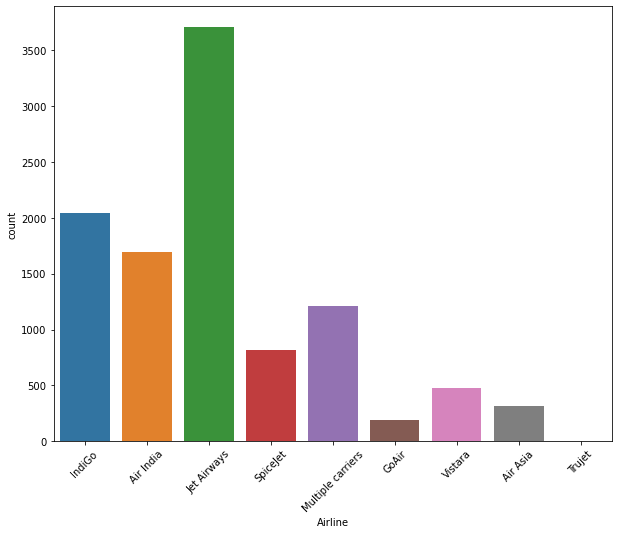

In [58]:
plt.figure (figsize = (10, 8))
sns.countplot (data ['Airline'])
plt.xticks (rotation = 45)

<AxesSubplot:xlabel='Source', ylabel='count'>

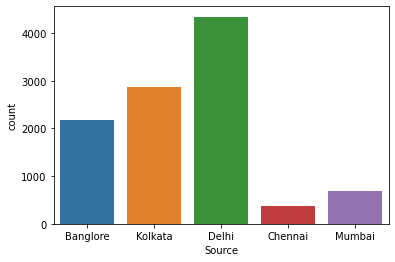

In [59]:
sns.countplot (data ['Source'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

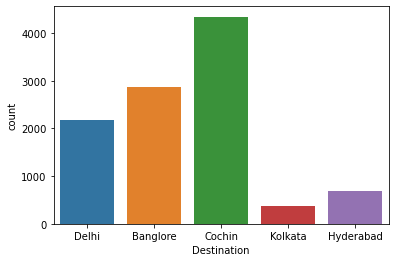

In [60]:
sns.countplot (data ['Destination'])

<AxesSubplot:xlabel='month', ylabel='count'>

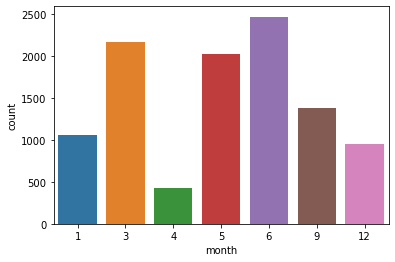

In [61]:
sns.countplot (data ['month'])

<AxesSubplot:xlabel='weekday', ylabel='count'>

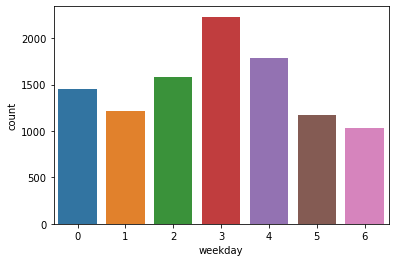

In [62]:
sns.countplot (data ['weekday'])

<AxesSubplot:xlabel='Dep_Time_hour', ylabel='count'>

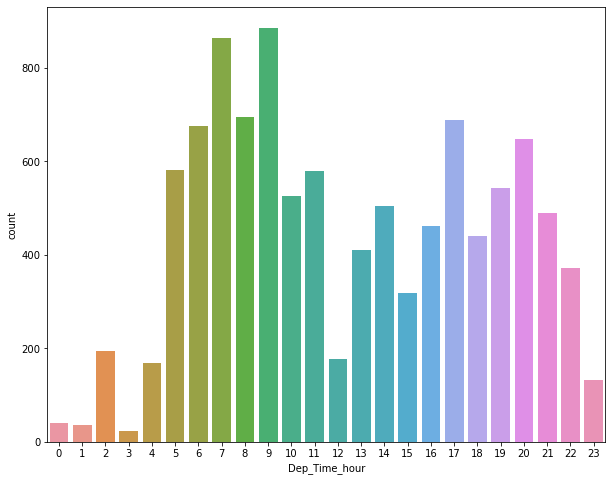

In [63]:
plt.figure (figsize = (10, 8))
sns.countplot (data ['Dep_Time_hour'])

#### Bivariate Analysis :

<AxesSubplot:xlabel='Source', ylabel='Price'>

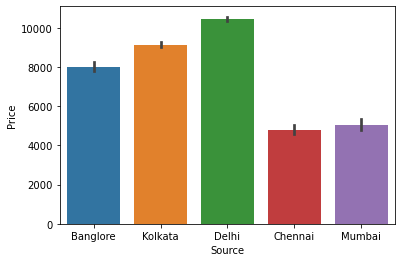

In [64]:
sns.barplot (data ['Source'], data ['Price'])

<AxesSubplot:xlabel='month', ylabel='Price'>

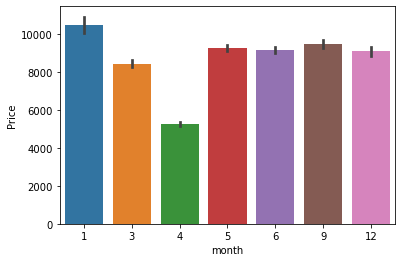

In [65]:
sns.barplot (data ['month'], data ['Price'])

<AxesSubplot:xlabel='Airline', ylabel='Price'>

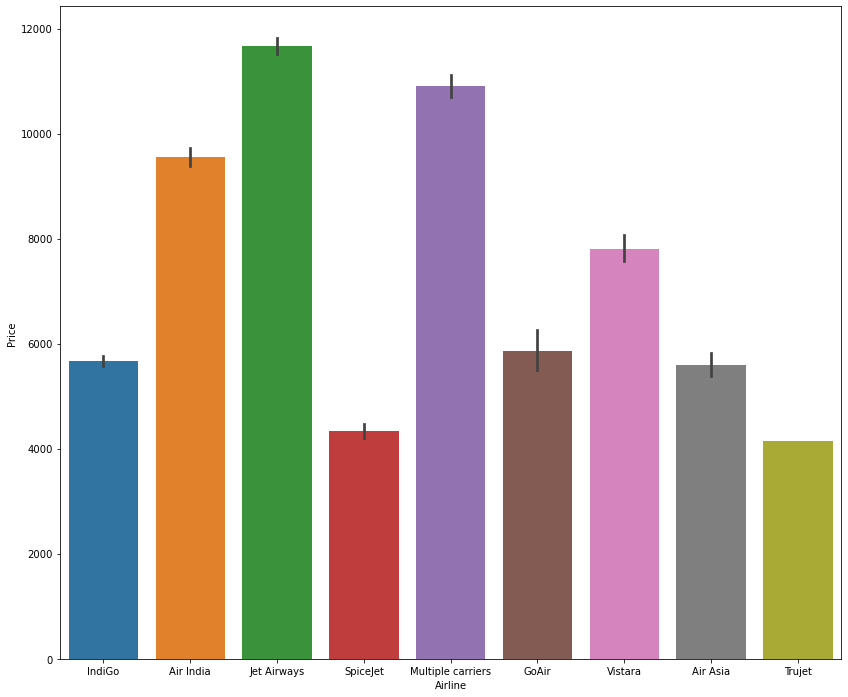

In [66]:
plt.figure (figsize = (14, 12))
sns.barplot (data ['Airline'], data ['Price'])

### Model Building :

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = data_model.drop ('Price', axis = 1)
y = data_model ['Price']

In [18]:
X

,Total_Stops,day,month,weekday,Arrival_Time_Hour,Arrival_Time_Minutes,Dep_Time_hour,Dep_Time_Minute,Duration_Total_Hour,Airline_Air Asia,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,6,1,10,22,20,2.833333,0,...,1,0,0,0,0,0,0,1,0,0
1,2,5,1,5,13,15,5,50,7.416667,0,...,0,0,0,1,0,1,0,0,0,0
2,2,6,9,4,4,25,9,25,19.000000,0,...,0,0,1,0,0,0,1,0,0,0
3,1,5,12,3,23,30,18,5,5.416667,0,...,0,0,0,1,0,1,0,0,0,0
4,1,3,1,3,21,35,16,50,4.750000,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4,9,2,22,25,19,55,2.500000,1,...,0,0,0,1,0,1,0,0,0,0
10679,0,27,4,5,23,20,20,45,2.583333,0,...,0,0,0,1,0,1,0,0,0,0
10680,0,27,4,5,11,20,8,20,3.000000,0,...,1,0,0,0,0,0,0,1,0,0
10681,0,3,1,3,14,10,11,30,2.666667,0,...,1,0,0,0,0,0,0,1,0,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

### Modelling :

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
def predict (ml_model):
    
    print ('Model name : {}'.format (ml_model))
    model = ml_model.fit (X_train, y_train)
    
    print ('Training Score : {}'.format (model.score (X_train, y_train)))
    predictions = model.predict (X_test)
    
    r2score = r2_score (y_test, predictions)
    print ('R2 score is : {}'.format (r2score))
    
    adj_r2 = 1 - (1 - r2score) * ((len (X_test) - 1) / (len (X_test) - X_test.shape[1]-1))
    print ('Adjusted R2 score is : {}'.format (adj_r2))
    
    print ('MAE : {}'.format (mean_absolute_error (y_test, predictions)))
    print ('MSE : {}'.format (mean_squared_error (y_test, predictions)))
    print ('RMSE : {}'.format (np.sqrt (mean_squared_error (y_test, predictions))))

In [23]:
predict (LinearRegression())

Model name : LinearRegression()
Training Score : 0.5442219232600805
R2 score is : 0.5470864540232889
Adjusted R2 score is : 0.5409422780119769
MAE : 2115.591197920803
MSE : 9443372.608912738
RMSE : 3073.0070954868843


In [24]:
predict (DecisionTreeRegressor())

Model name : DecisionTreeRegressor()
Training Score : 0.969740512514991
R2 score is : 0.6848396809069321
Adjusted R2 score is : 0.6805642502215611
MAE : 1392.704132823698
MSE : 6571179.756440119
RMSE : 2563.4312466770234


In [25]:
predict (RandomForestRegressor())

Model name : RandomForestRegressor()
Training Score : 0.9502916743020646
R2 score is : 0.804584948667862
Adjusted R2 score is : 0.8019339692893253
MAE : 1185.630514318325
MSE : 4074457.8286781437
RMSE : 2018.5286296404477


In [26]:
predict (XGBRegressor())

Model name : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training Score : 0.9406937875575051
R2 score is : 0.8310465398610773
Adjusted R2 score is : 0.8287545355568672
MAE : 1160.3296943588002
MSE : 3522726.3389003896
RMSE : 1876.8927350545075


### Hyper Parameter Optimization :

In [40]:
params={
 "learning_rate"    : [0.20, 0.25, 0.30, 0.35, 0.40, 0.45] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [28]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [29]:
import xgboost
regressor = xgboost.XGBRegressor()

In [41]:
random_search = RandomizedSearchCV (regressor, param_distributions = params, n_iter = 5, scoring = 'roc_auc', n_jobs = -1,
                                   cv = 5, verbose = 3)

In [31]:
X.head()

,Total_Stops,day,month,weekday,Arrival_Time_Hour,Arrival_Time_Minutes,Dep_Time_hour,Dep_Time_Minute,Duration_Total_Hour,Airline_Air Asia,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,6,1,10,22,20,2.833333,0,...,1,0,0,0,0,0,0,1,0,0
1,2,5,1,5,13,15,5,50,7.416667,0,...,0,0,0,1,0,1,0,0,0,0
2,2,6,9,4,4,25,9,25,19.000000,0,...,0,0,1,0,0,0,1,0,0,0
3,1,5,12,3,23,30,18,5,5.416667,0,...,0,0,0,1,0,1,0,0,0,0
4,1,3,1,3,21,35,16,50,4.750000,0,...,1,0,0,0,0,0,0,1,0,0


In [42]:
random_search.fit (X, y)
random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [43]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [44]:
regressor = xgboost.XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=np.nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None)

In [45]:
from sklearn.model_selection import cross_val_score
score = cross_val_score (regressor, X, y, cv = 10)

In [46]:
score

array([0.81310096, 0.80003805, 0.77463582, 0.80241042, 0.82423776,
       0.80025746, 0.81131082, 0.81744384, 0.77902085, 0.77606072])

In [47]:
(score.mean()) * 100

79.98516691571768

### XGBoost :

In [48]:
predict (XGBRegressor())

Model name : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training Score : 0.9406937875575051
R2 score is : 0.8310465398610773
Adjusted R2 score is : 0.8287545355568672
MAE : 1160.3296943588002
MSE : 3522726.3389003896
RMSE : 1876.8927350545075


In [49]:
predict (regressor)

Model name : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training Score : 0.9510105790222847
R2 score is : 0.7870762813114262
Adjusted R2 score is : 0.7841877812516974
MAE : 1287.2321958145455
MSE : 4439518.382068685
RMSE : 2107.0164645936406
